### **Описание проекта**


Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. 
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». 
Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. 
В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 
Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### **Описание тарифов**

**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей


``` Примечание 

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.```


#### **Инструкция по выполнению проекта**

1. Шаг 1. Откройте файл с данными и изучите общую информацию

2. Шаг 2. Подготовьте данные:

- Приведите данные к нужным типам;
- Найдите и исправьте ошибки в данных, если они есть.
- Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять. 
- Посчитайте для каждого пользователя:
    - количество сделанных звонков и израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

3. Шаг 3. Проанализируйте данные
- Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- Посчитайте среднее количество, дисперсию и стандартное отклонение. 
- Постройте гистограммы. Опишите распределения.

4. Шаг 4. Проверьте гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
- Пороговое значение alpha задайте самостоятельно.
- Поясните:
    - как вы формулировали нулевую и альтернативную гипотезы;
    - какой критерий использовали для проверки гипотез и почему.

5. Шаг 5. Напишите общий вывод

Оформление: Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

______________

## Рассмотрим таблицы и их содержимое  

In [353]:
import pandas as pd
import math

In [354]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [355]:
calls = pd.read_csv(r'calls.csv')
internet = pd.read_csv(r'internet.csv')
mess = pd.read_csv(r'messages.csv')
tariffs = pd.read_csv(r'tariffs.csv')
users = pd.read_csv(r'users.csv')

tables = [calls, internet, mess, tariffs, users]

In [356]:
calls.info()
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Приведем данные к верным типам: заменим колонки с датами на формат даты/времени

In [357]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])

__________
Теперь посмотрим на таблицы

In [358]:
internet.head(7)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000


In [359]:
internet.sample(n=7)

,Unnamed: 0,id,mb_used,session_date,user_id
62896,62896,1213_278,723.70,2018-09-13,1213
33026,33026,1116_67,566.36,2018-06-26,1116
114571,114571,1386_24,918.79,2018-09-29,1386
87069,87069,1294_411,317.40,2018-05-24,1294
73131,73131,1247_169,571.45,2018-09-25,1247
23822,23822,1081_117,1097.97,2018-06-13,1081
139848,139848,1469_236,540.14,2018-10-13,1469


Видим, что в таблице **internet** дополнительная колонка, отвечающая индексам. Удалим ее 

In [360]:
internet = internet.drop(['Unnamed: 0'], axis = 1)

In [361]:
calls.sample(n=7)

,id,call_date,duration,user_id
172434,1426_78,2018-09-16,0.00,1426
105019,1270_11,2018-11-30,0.92,1270
132599,1340_573,2018-03-31,7.38,1340
178581,1444_110,2018-11-29,0.00,1444
104509,1268_71,2018-06-28,3.09,1268
180650,1452_24,2018-06-23,0.00,1452
187257,1462_187,2018-11-11,5.68,1462


In [362]:
mess.info()
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7

In [363]:
mess['message_date'] = pd.to_datetime(mess['message_date'])

In [364]:
mess.sample(n=7)

,id,message_date,user_id
116695,1474_81,2018-11-27,1474
63491,1277_168,2018-10-14,1277
21291,1089_1294,2018-04-14,1089
62428,1274_14,2018-08-07,1274
66718,1284_306,2018-04-11,1284
90160,1374_608,2018-09-24,1374
19737,1088_27,2018-11-23,1088


In [365]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [366]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [367]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Наблюдаем пропущенные значения в колонке churn_date. Посмотрим на уникальные из них:

In [368]:
users['churn_date'].value_counts()

churn_date
2018-12-03    2
2018-10-03    2
2018-10-14    2
2018-12-09    2
2018-12-21    2
2018-12-30    1
2018-10-28    1
2018-11-26    1
2018-11-27    1
2018-11-16    1
2018-10-27    1
2018-10-05    1
2018-09-27    1
2018-11-13    1
2018-12-25    1
2018-12-14    1
2018-12-24    1
2018-09-26    1
2018-11-22    1
2018-08-17    1
2018-10-04    1
2018-09-02    1
2018-12-18    1
2018-11-30    1
2018-12-20    1
2018-12-16    1
2018-11-07    1
2018-12-23    1
2018-08-31    1
2018-12-26    1
2018-12-11    1
2018-11-21    1
2018-10-25    1
Name: count, dtype: int64

Видим, что даты присуствуют, переведем их в соотвествующий формат

In [369]:
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [370]:
users.sample(n=7)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
489,1489,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
399,1399,31,2018-12-25,Уфа,Алиса,Абрашина,2018-11-06,ultra
169,1169,52,NaT,Сочи,Георгина,Карташова,2018-06-25,smart
344,1344,60,NaT,Воронеж,Илзе,Игнатьева,2018-04-03,ultra
267,1267,63,NaT,Екатеринбург,Яна,Седова,2018-08-05,smart
385,1385,26,NaT,Москва,Алиса,Дубинина,2018-01-13,ultra
250,1250,20,NaT,Смоленск,Лия,Ракова,2018-04-11,smart


_______________________

Начнем работу над поиском аномалий в данных

In [371]:

def columns_with_missing(data):
    # поиск и вывод столбцов с пропущенными значениями
    columns_with_missing_values = data.columns[data.isna().any()].tolist()
    return (columns_with_missing_values)

def relative_num_of_null(data):
    # функция принимает датасет и обнаруженные столбцы с пропусками
    # возвращает относительное (%) количество пропусков в столбцах
    cols = columns_with_missing(data)
    for col in cols:
        num_of_null = data.isnull().sum()[col]
        num_of_all = len(data)
        relative_null = round(100* num_of_null/num_of_all,2)
        print (f'Процентное содержание пропущенных значений в столбце {col} составляет {relative_null} %')

Пропущенные значения  присутсвуют лишь в таблице users, получим информацию об их относительном количестве: 

In [372]:
relative_num_of_null(users)

Процентное содержание пропущенных значений в столбце churn_date составляет 92.4 %


Столбец с пропущенным значением характеризуется следующим образом: дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных). Следовательно, лишь около 8 процентов пользователей прекратили пользование тарифом. Не будем ничем заполнять пропуски. 

In [373]:
def numeric_cols_decsribe(data):
# выберем числовые стобцы и посмотрим на их статистики
    numeric_cols = data.select_dtypes('number')
    numeric_cols_des = numeric_cols.describe()
    print(numeric_cols_des)

In [374]:
numeric_cols_decsribe(calls)

            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000


Видим звонки нулевой продолжительностью - это не аномалия, лишь пропущенные звонки.
Таблица **calls** готова к анализу

In [375]:
numeric_cols_decsribe(internet)

             mb_used        user_id
count  149396.000000  149396.000000
mean      370.192426    1252.099842
std       278.300951     144.050823
min         0.000000    1000.000000
25%       138.187500    1130.000000
50%       348.015000    1251.000000
75%       559.552500    1380.000000
max      1724.830000    1499.000000


In [376]:
numeric_cols_decsribe(mess)

             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000


In [377]:
numeric_cols_decsribe(tariffs)

       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15360.000000        500.000000   
25%           287.500000           19200.000000       1125.000000   
50%           525.000000           23040.000000       1750.000000   
75%           762.500000           26880.000000       2375.000000   
max          1000.000000           30720.000000       3000.000000   

       rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute  
count         2.000000    2.000000         2.000000        2.000000  
mean       1250.000000  175.000000         2.000000        2.000000  
std         989.949494   35.355339         1.414214        1.414214  
min         550.000000  150.000000         1.000000        1.000000  
25%         900.000000  162.

In [378]:
numeric_cols_decsribe(users)

           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000


Явных аномалий не замечено, все таблицы готовы к анализу

_______

Теперь необходимо посчитать количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя из таблицы calls

In [379]:
calls.head(7)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000


In [380]:
calls['call_date'].describe()

count                           202607
mean     2018-09-02 20:01:37.583992832
min                2018-01-01 00:00:00
25%                2018-07-05 00:00:00
50%                2018-09-17 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: call_date, dtype: object

In [381]:
# создадим соотвествующие столбцы и применим группировку для подсчета
# т.к. данные лишь за один год не будем в колонке с датой использовать всю дату, только номер месяца

mounth_metrics = calls.groupby(['user_id', calls['call_date'].dt.month] ).agg(count_call=('id', 'count')).reset_index()
mounth_metrics = mounth_metrics.rename(columns={'call_date': 'month'})
total_duration = calls.groupby(['user_id', calls['call_date'].dt.month]).agg(total_duration=('duration', 'sum')).reset_index()

# Переименование столбца с месяцем
total_duration = total_duration.rename(columns={'call_date': 'month'})

# Объединение двух DataFrame по столбцам user_id и month
mounth_metrics = pd.merge(mounth_metrics, total_duration, on=['user_id', 'month'])
mounth_metrics.head()

# calls['count_call'] = calls.groupby('user_id')['id'].transform('count')
# calls['total_duration'] = calls.groupby('user_id')['duration'].transform('sum')


,user_id,month,count_call,total_duration
0,1000,5,22,150.06
1,1000,6,43,158.90
2,1000,7,47,318.80
3,1000,8,52,389.87
4,1000,9,58,440.14


____

Также подсчитаем количество отправленных сообщений по месяцам

In [382]:
count_mess = mess.groupby(['user_id', mess['message_date'].dt.month]).agg(count_mess=('message_date', 'count')).reset_index()
count_mess = count_mess.rename(columns={'message_date': 'month'})

mounth_metrics = pd.merge(mounth_metrics, count_mess, on=['user_id', 'month'])
mounth_metrics.head()

,user_id,month,count_call,total_duration,count_mess
0,1000,5,22,150.06,22
1,1000,6,43,158.90,60
2,1000,7,47,318.80,75
3,1000,8,52,389.87,81
4,1000,9,58,440.14,57


______
Теперь необходимо добавить объем израсходованного интернет-трафика по месяцам из таблицы internet 

In [383]:
total_mb = internet.groupby(['user_id', internet['session_date'].dt.month]).agg(total_mb=('mb_used', 'sum')).reset_index()
total_mb = total_mb.rename(columns={'session_date': 'month'})

mounth_metrics = pd.merge(mounth_metrics, total_mb, on=['user_id', 'month'])

mounth_metrics.head()

,user_id,month,count_call,total_duration,count_mess,total_mb
0,1000,5,22,150.06,22,2253.49
1,1000,6,43,158.90,60,23233.77
2,1000,7,47,318.80,75,14003.64
3,1000,8,52,389.87,81,14055.93
4,1000,9,58,440.14,57,14568.91


____________
Посчитаем помесячную выручку с каждого пользователя:

- вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
- остаток умножим на значение из тарифного плана; 
- прибавим абонентскую плату, соответствующую тарифному плану

In [384]:
# добавим наименование тарифного плана 

mounth_metrics = pd.merge(mounth_metrics, users[['tariff', 'user_id']], on='user_id')
mounth_metrics.head()

,user_id,month,count_call,total_duration,count_mess,total_mb,tariff
0,1000,5,22,150.06,22,2253.49,ultra
1,1000,6,43,158.90,60,23233.77,ultra
2,1000,7,47,318.80,75,14003.64,ultra
3,1000,8,52,389.87,81,14055.93,ultra
4,1000,9,58,440.14,57,14568.91,ultra


**Тариф «Ультра»**

- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 
- 1000 сообщений 
- 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

**Тариф «Смарт»**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 
- 50 сообщений 
- 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

In [385]:
# сначала округлим все значения минут и гб в сторону бОльших целых чисел

# переведем мб в гб делением на 1024
mounth_metrics['total_mb'] = mounth_metrics['total_mb'].apply(lambda x: math.ceil(x/1024))
mounth_metrics = mounth_metrics.rename(columns={'total_mb': 'total_gb'})

mounth_metrics['total_duration'] = mounth_metrics['total_duration'].apply(lambda x: math.ceil(x))

mounth_metrics.head()

,user_id,month,count_call,total_duration,count_mess,total_gb,tariff
0,1000,5,22,151,22,3,ultra
1,1000,6,43,159,60,23,ultra
2,1000,7,47,319,75,14,ultra
3,1000,8,52,390,81,14,ultra
4,1000,9,58,441,57,15,ultra


In [386]:

# добавим колонку с суммарным числом платы, куда будем суммировать цену за пользование тарифа

# сначала внесем ежемесячную плату 
mounth_metrics.loc[mounth_metrics['tariff'] == 'ultra', 'total_price'] = 1950
mounth_metrics.loc[mounth_metrics['tariff'] == 'smart', 'total_price'] = 550

# теперь добавим сумму за избыточные пользования услугами
# для этого из каждого тарифного плана вычтем базовые количества и занесем избыточные в новые колонки

# звонки
mounth_metrics['excess_duration'] = mounth_metrics['total_duration']
mounth_metrics.loc[mounth_metrics['tariff'] == 'ultra', 'excess_duration'] -= 3000
mounth_metrics.loc[(mounth_metrics['tariff'] == 'ultra')&(mounth_metrics['excess_duration']< 0) , 'excess_duration'] = 0

mounth_metrics.loc[mounth_metrics['tariff'] == 'smart', 'excess_duration'] -= 500
mounth_metrics.loc[(mounth_metrics['tariff'] == 'smart')&(mounth_metrics['excess_duration']< 0) , 'excess_duration'] = 0

# интернет
mounth_metrics['excess_gb'] = mounth_metrics['total_gb']
mounth_metrics.loc[mounth_metrics['tariff'] == 'ultra', 'excess_gb'] -= 30
mounth_metrics.loc[(mounth_metrics['tariff'] == 'ultra')&(mounth_metrics['excess_gb']< 0) , 'excess_gb'] = 0

mounth_metrics.loc[mounth_metrics['tariff'] == 'smart', 'excess_gb'] -= 15
mounth_metrics.loc[(mounth_metrics['tariff'] == 'smart')&(mounth_metrics['excess_gb']< 0) , 'excess_gb'] = 0

# сообщения
mounth_metrics['excess_mess'] = mounth_metrics['count_mess']
mounth_metrics.loc[mounth_metrics['tariff'] == 'ultra', 'excess_mess'] -= 1000
mounth_metrics.loc[(mounth_metrics['tariff'] == 'ultra')&(mounth_metrics['excess_mess']< 0) , 'excess_mess'] = 0

mounth_metrics.loc[mounth_metrics['tariff'] == 'smart', 'excess_mess'] -= 50
mounth_metrics.loc[(mounth_metrics['tariff'] == 'smart')&(mounth_metrics['excess_mess']< 0) , 'excess_mess'] = 0


In [387]:
mounth_metrics.sample(n=10)

,user_id,month,count_call,total_duration,count_mess,total_gb,tariff,total_price,excess_duration,excess_gb,excess_mess
1316,1263,10,90,731,8,22,smart,550.0,231,7,0
585,1110,6,48,343,29,25,smart,550.0,0,10,0
2419,1455,7,81,560,4,9,ultra,1950.0,0,0,0
505,1094,5,16,102,3,0,ultra,1950.0,0,0,0
264,1050,9,26,213,33,30,ultra,1950.0,0,0,0
1553,1308,4,28,190,24,17,smart,550.0,0,2,0
601,1113,4,109,744,42,17,smart,550.0,244,2,0
299,1056,5,55,437,49,18,smart,550.0,0,3,0
2336,1438,11,44,291,66,12,smart,550.0,0,0,16
2437,1458,5,101,650,5,13,ultra,1950.0,0,0,0


In [388]:
# ultra
#total_price += total_duration*1 + count_mess*1 + total_gb*150

mounth_metrics.loc[mounth_metrics['tariff'] == 'ultra', 'total_price'] += mounth_metrics['excess_duration'] *1 + mounth_metrics['excess_mess']*1 + mounth_metrics['excess_gb'] *150

#smart
#total_price += total_duration*3 + count_mess*3 + total_gb*200
mounth_metrics.loc[mounth_metrics['tariff'] == 'smart', 'total_price'] += mounth_metrics['excess_duration'] *3 + mounth_metrics['excess_mess']*3 + mounth_metrics['excess_gb']*200


mounth_metrics.sample(n=10)

,user_id,month,count_call,total_duration,count_mess,total_gb,tariff,total_price,excess_duration,excess_gb,excess_mess
1702,1331,12,64,526,64,34,ultra,2550.0,0,4,0
1624,1319,9,121,681,60,21,smart,2323.0,181,6,10
100,1016,12,16,89,103,19,ultra,1950.0,0,0,0
1796,1350,9,51,283,42,19,ultra,1950.0,0,0,0
868,1168,10,176,1263,38,36,ultra,2850.0,0,6,0
855,1167,9,6,32,12,2,ultra,1950.0,0,0,0
1752,1340,11,69,509,9,16,smart,777.0,9,1,0
635,1123,3,33,221,6,8,smart,550.0,0,0,0
894,1172,10,57,336,4,32,smart,3950.0,0,17,0
1926,1375,6,128,990,72,20,ultra,1950.0,0,0,0


___________________




**Теперь проанализируем поведение пользователей разных тарифов**

Опишите поведение клиентов оператора, исходя из выборки. 
- Сколько минут разговора, 
- сколько сообщений
- какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 

- Посчитайте среднее количество, дисперсию и стандартное отклонение. 
- Постройте гистограммы. 
- Опишите распределения.

In [389]:
ultra_df = mounth_metrics[mounth_metrics['tariff'] == 'ultra']
smart_df = mounth_metrics[mounth_metrics['tariff'] == 'smart']

In [390]:
ultra_df.describe()

,user_id,month,count_call,total_duration,count_mess,total_gb,total_price,excess_duration,excess_gb,excess_mess
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.0,752.000000,752.0
mean,1274.873670,8.398936,77.674202,526.154255,61.640957,19.618351,2048.936170,0.0,0.659574,0.0
std,142.286226,2.810082,43.116712,294.442478,44.816850,9.387888,332.893038,0.0,2.219287,0.0
min,1000.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1950.000000,0.0,0.000000,0.0
25%,1151.000000,6.000000,46.000000,315.000000,25.000000,12.000000,1950.000000,0.0,0.000000,0.0
50%,1310.000000,9.000000,77.000000,506.500000,53.000000,19.000000,1950.000000,0.0,0.000000,0.0
75%,1385.000000,11.000000,106.000000,718.000000,89.000000,27.000000,1950.000000,0.0,0.000000,0.0
max,1495.000000,12.000000,244.000000,1579.000000,224.000000,49.000000,4800.000000,0.0,19.000000,0.0


Наблюдаем редкий выход за рамки тарифа от пользователей "Ультра"

In [391]:
smart_df.describe()

,user_id,month,count_call,total_duration,count_mess,total_gb,total_price,excess_duration,excess_gb,excess_mess
count,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000
mean,1247.916449,8.319060,58.871540,397.857963,38.767102,16.362924,1257.947258,30.728460,2.977546,6.750914
std,147.151477,2.931832,25.555688,177.566650,26.810513,5.671279,805.100577,71.111414,3.701368,14.280080
min,1002.000000,1.000000,1.000000,0.000000,1.000000,0.000000,550.000000,0.000000,0.000000,0.000000
25%,1123.000000,6.000000,40.000000,270.000000,17.000000,13.000000,550.000000,0.000000,0.000000,0.000000
50%,1244.000000,9.000000,60.000000,404.000000,34.000000,17.000000,953.000000,0.000000,2.000000,0.000000
75%,1383.000000,11.000000,76.000000,517.000000,55.000000,20.000000,1730.000000,17.000000,5.000000,5.000000
max,1499.000000,12.000000,198.000000,1355.000000,143.000000,38.000000,6614.000000,855.000000,23.000000,93.000000


Аналогичная ситуация для пользователей тарифа "Смарт" изредка превышают пользование услугами и доплачивают свех ежемесячного платежа

______
Приступим к построению визуализаций


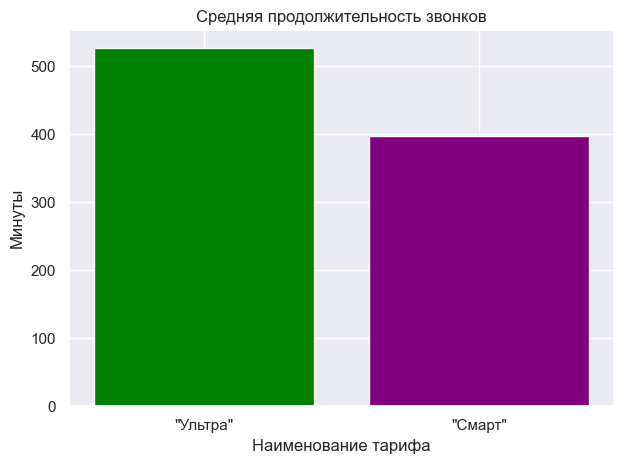

In [392]:

import matplotlib.pyplot as plt
import numpy as np

# создаем фигуру и оси
fig, ax = plt.subplots()

# задаем ширину столбцов
bar_width = 1

ax.bar(0, ultra_df['total_duration'].mean(), color='green')

# строим столбчатую диаграмму для второго набора данных
ax.bar(1, smart_df['total_duration'].mean(), color='purple')

# добавляем подписи к столбцам
ax.set_xticks([0, 1])
ax.set_xticklabels(['"Ультра"', '"Смарт"'])

# добавляем название диаграммы
ax.set_title('Средняя продолжительность звонков')

# добавляем подписи к осям
ax.set_xlabel('Наименование тарифа')
ax.set_ylabel('Минуты')

# показываем диаграмму
plt.show()


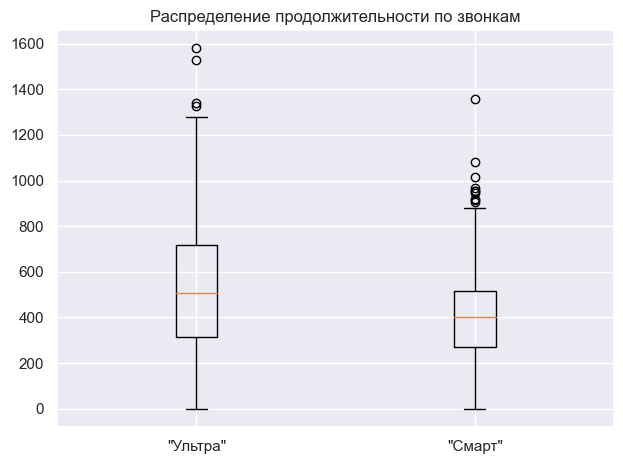

In [393]:
# создаем фигуру и оси
fig, ax = plt.subplots()

# строим ящики с усами
ax.boxplot([ultra_df['total_duration'], smart_df['total_duration']])

# добавляем подписи к столбцам
ax.set_xticklabels(['"Ультра"', '"Смарт"'])

# добавляем название диаграммы
ax.set_title('Распределение продолжительности по звонкам')

# показываем график
plt.show()

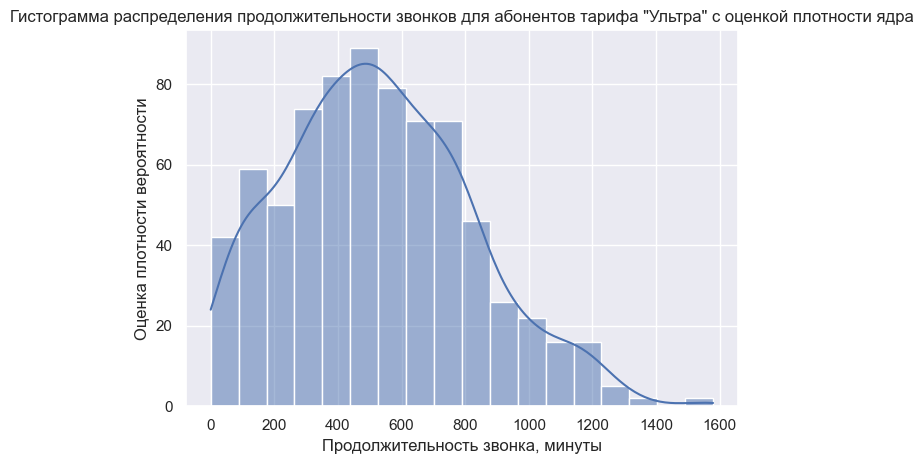

In [394]:
import seaborn as sns
import matplotlib.pyplot as plt

# строим гистограмму с оценкой плотности ядра
ax = sns.histplot(ultra_df['total_duration'], kde=True)

# добавляем название диаграммы
ax.set_title('Гистограмма распределения продолжительности звонков для абонентов тарифа "Ультра" с оценкой плотности ядра')

# добавляем подписи к осям
ax.set_xlabel('Продолжительность звонка, минуты')
ax.set_ylabel('Оценка плотности вероятности' )

# показываем график
plt.show()


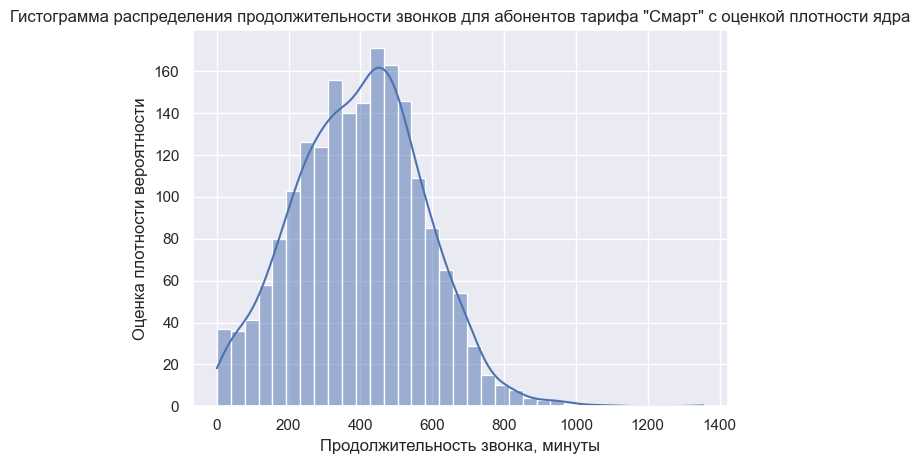

In [395]:

# строим гистограмму с оценкой плотности ядра
ax = sns.histplot(smart_df['total_duration'], kde=True)

# добавляем название диаграммы
ax.set_title('Гистограмма распределения продолжительности звонков для абонентов тарифа "Смарт" с оценкой плотности ядра')

# добавляем подписи к осям
ax.set_xlabel('Продолжительность звонка, минуты')
ax.set_ylabel('Оценка плотности вероятности')

# показываем график
plt.show()


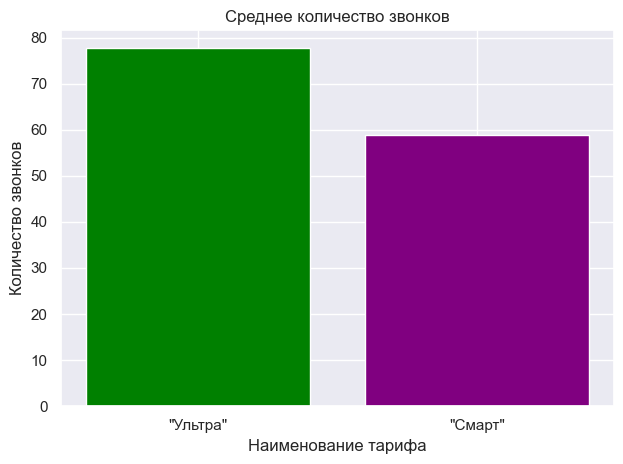

In [396]:
# count_call	total_duration	count_mess	total_gb	total_price	excess_duration	excess_gb	excess_mess

# создаем фигуру и оси
fig, ax = plt.subplots()

# задаем ширину столбцов
bar_width = 1

ax.bar(0, ultra_df['count_call'].mean(), color='green')

# строим столбчатую диаграмму для второго набора данных
ax.bar(1, smart_df['count_call'].mean(), color='purple')

# добавляем подписи к столбцам
ax.set_xticks([0, 1])
ax.set_xticklabels(['"Ультра"', '"Смарт"'])

# добавляем название диаграммы
ax.set_title('Среднее количество звонков')

# добавляем подписи к осям
ax.set_xlabel('Наименование тарифа')
ax.set_ylabel('Количество звонков')

# показываем диаграмму
plt.show()

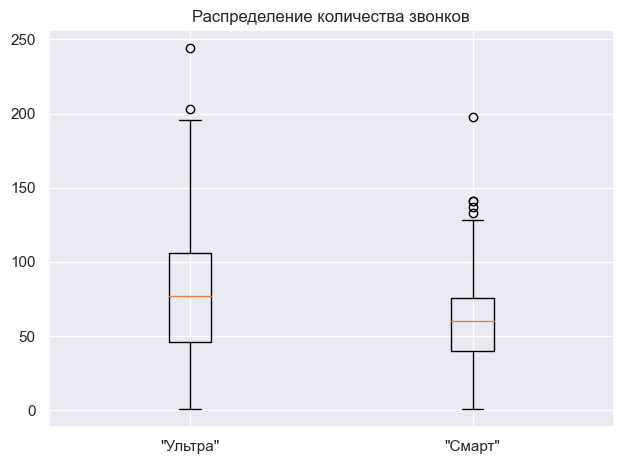

In [397]:
# создаем фигуру и оси
fig, ax = plt.subplots()

# строим ящики с усами
ax.boxplot([ultra_df['count_call'], smart_df['count_call']])

# добавляем подписи к столбцам
ax.set_xticklabels(['"Ультра"', '"Смарт"'])

# добавляем название диаграммы
ax.set_title('Распределение количества звонков')

# показываем график
plt.show()

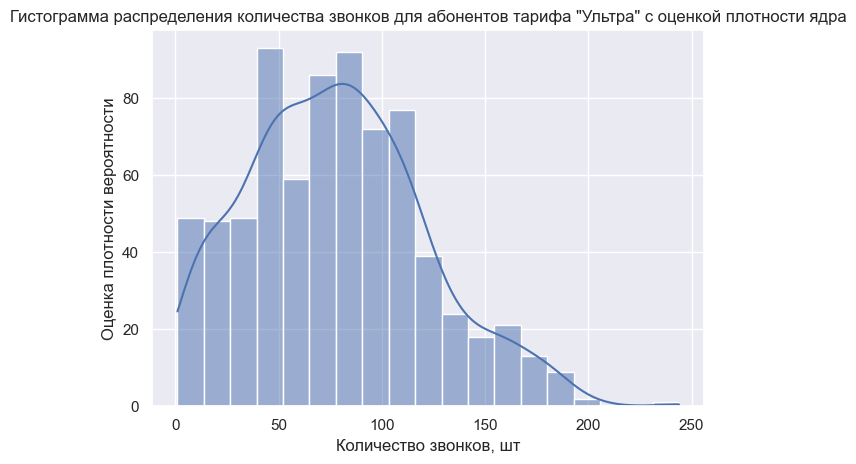

In [398]:

# строим гистограмму с оценкой плотности ядра
ax = sns.histplot(ultra_df['count_call'], kde=True)

# добавляем название диаграммы
ax.set_title('Гистограмма распределения количества звонков для абонентов тарифа "Ультра" с оценкой плотности ядра')

# добавляем подписи к осям
ax.set_xlabel('Количество звонков, шт')
ax.set_ylabel('Оценка плотности вероятности')

# показываем график
plt.show()


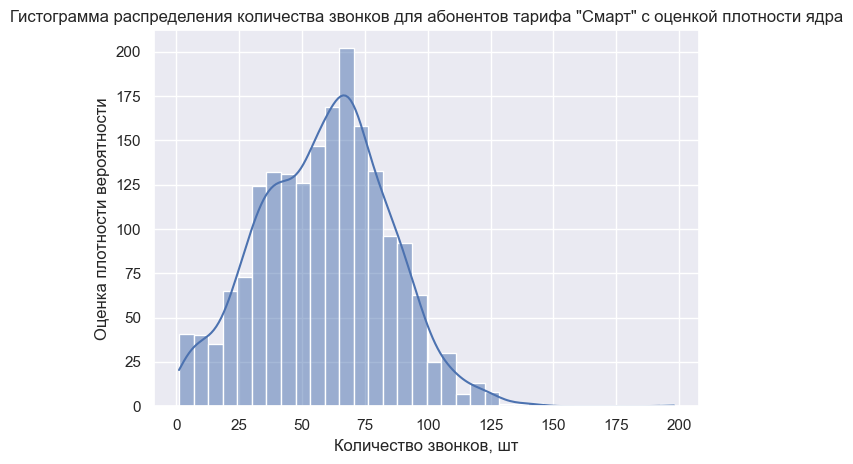

In [399]:
# строим гистограмму с оценкой плотности ядра
ax = sns.histplot(smart_df['count_call'], kde=True)

# добавляем название диаграммы
ax.set_title('Гистограмма распределения количества звонков для абонентов тарифа "Смарт" с оценкой плотности ядра')

# добавляем подписи к осям
ax.set_xlabel('Количество звонков, шт')
ax.set_ylabel('Оценка плотности вероятности')

# показываем график
plt.show()

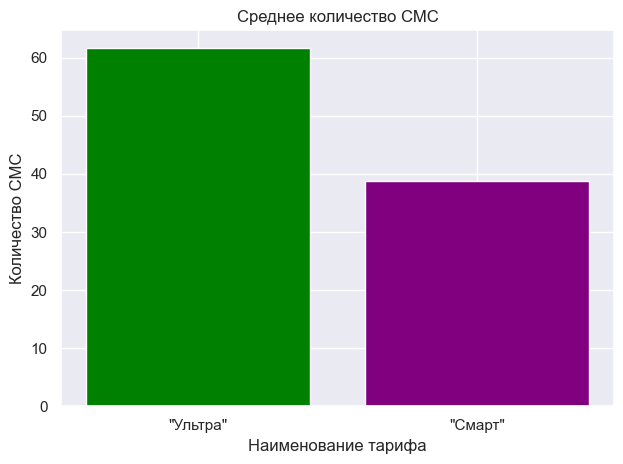

In [400]:
# 	count_mess	total_gb	total_price	excess_duration	excess_gb	excess_mess

# создаем фигуру и оси
fig, ax = plt.subplots()

# задаем ширину столбцов
bar_width = 1

ax.bar(0, ultra_df['count_mess'].mean(), color='green')

# строим столбчатую диаграмму для второго набора данных
ax.bar(1, smart_df['count_mess'].mean(), color='purple')

# добавляем подписи к столбцам
ax.set_xticks([0, 1])
ax.set_xticklabels(['"Ультра"', '"Смарт"'])

# добавляем название диаграммы
ax.set_title('Среднее количество СМС')

# добавляем подписи к осям
ax.set_xlabel('Наименование тарифа')
ax.set_ylabel('Количество СМС')

# показываем диаграмму
plt.show()

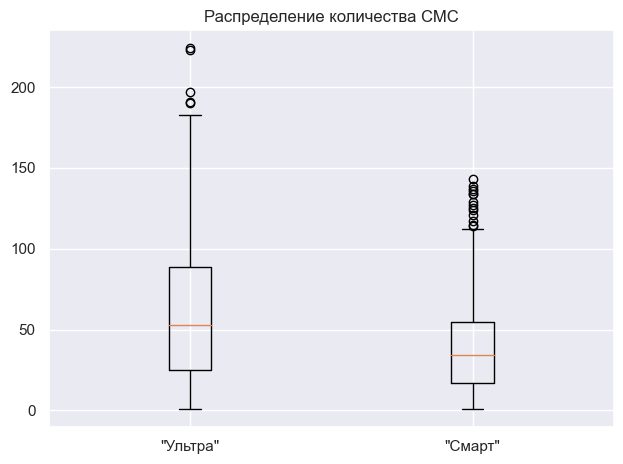

In [401]:
# создаем фигуру и оси
fig, ax = plt.subplots()

# строим ящики с усами
ax.boxplot([ultra_df['count_mess'], smart_df['count_mess']])

# добавляем подписи к столбцам
ax.set_xticklabels(['"Ультра"', '"Смарт"'])

# добавляем название диаграммы
ax.set_title('Распределение количества СМС')

# показываем график
plt.show()

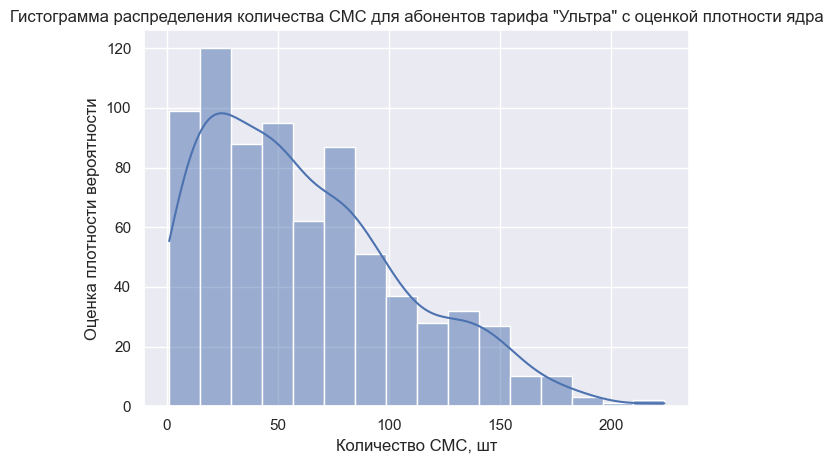

In [402]:
# строим гистограмму с оценкой плотности ядра
ax = sns.histplot(ultra_df['count_mess'], kde=True)

# добавляем название диаграммы
ax.set_title('Гистограмма распределения количества СМС для абонентов тарифа "Ультра" с оценкой плотности ядра')

# добавляем подписи к осям
ax.set_xlabel('Количество СМС, шт')
ax.set_ylabel('Оценка плотности вероятности')

# показываем график
plt.show()

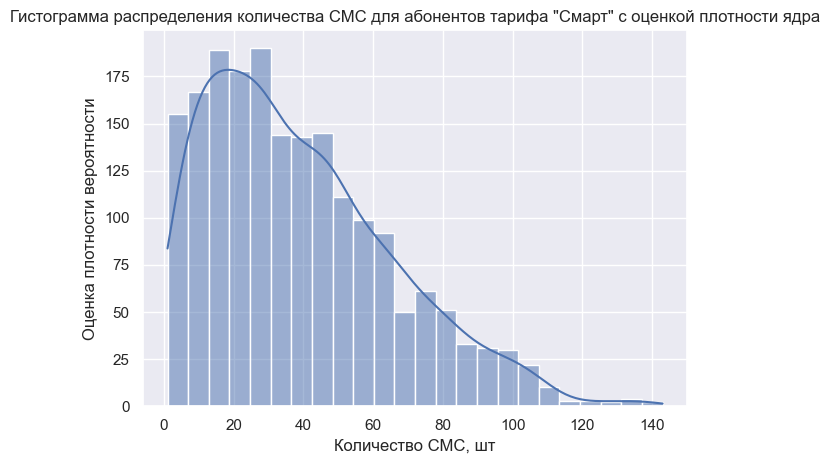

In [403]:
# строим гистограмму с оценкой плотности ядра
ax = sns.histplot(smart_df['count_mess'], kde=True)

# добавляем название диаграммы
ax.set_title('Гистограмма распределения количества СМС для абонентов тарифа "Смарт" с оценкой плотности ядра')

# добавляем подписи к осям
ax.set_xlabel('Количество СМС, шт')
ax.set_ylabel('Оценка плотности вероятности')

# показываем график
plt.show()

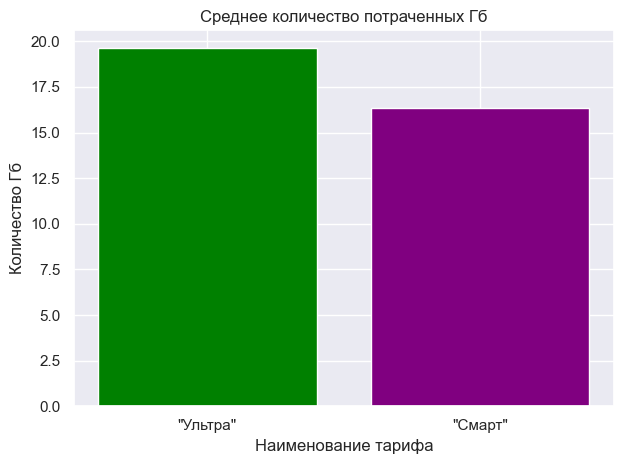

In [404]:
# total_gb	total_price	excess_duration	excess_gb	excess_mess

# создаем фигуру и оси
fig, ax = plt.subplots()

# задаем ширину столбцов
bar_width = 1

ax.bar(0, ultra_df['total_gb'].mean(), color='green')

# строим столбчатую диаграмму для второго набора данных
ax.bar(1, smart_df['total_gb'].mean(), color='purple')

# добавляем подписи к столбцам
ax.set_xticks([0, 1])
ax.set_xticklabels(['"Ультра"', '"Смарт"'])

# добавляем название диаграммы
ax.set_title('Среднее количество потраченных Гб')

# добавляем подписи к осям
ax.set_xlabel('Наименование тарифа')
ax.set_ylabel('Количество Гб')

# показываем диаграмму
plt.show()

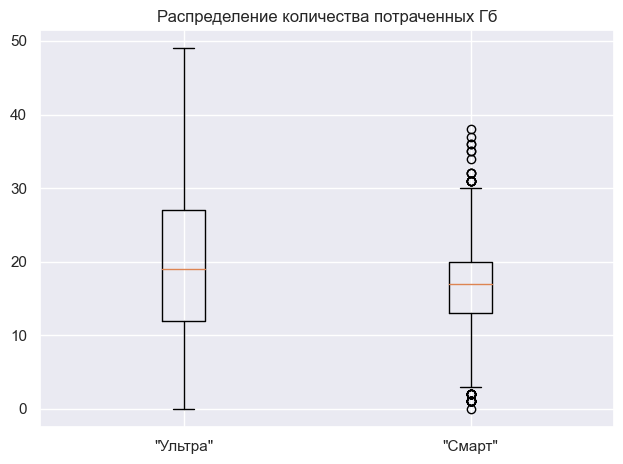

In [405]:
# создаем фигуру и оси
fig, ax = plt.subplots()

# строим ящики с усами
ax.boxplot([ultra_df['total_gb'], smart_df['total_gb']])

# добавляем подписи к столбцам
ax.set_xticklabels(['"Ультра"', '"Смарт"'])

# добавляем название диаграммы
ax.set_title('Распределение количества потраченных Гб')

# показываем график
plt.show()

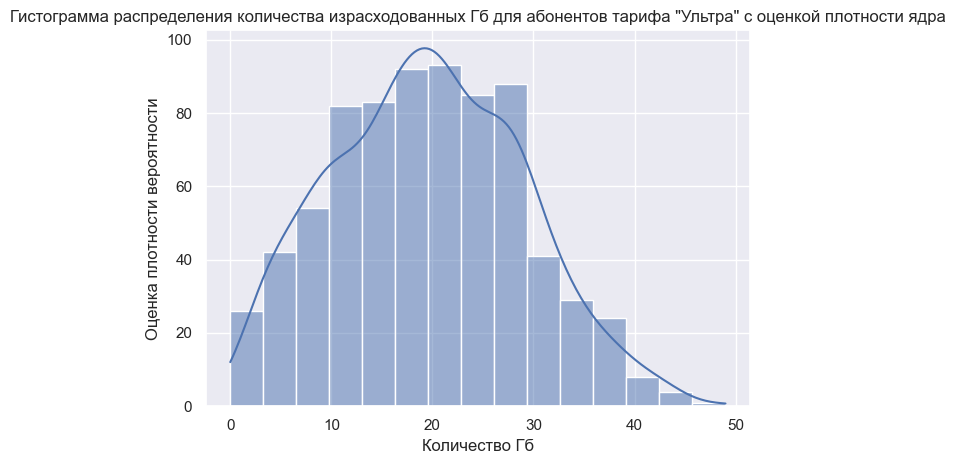

In [406]:
# строим гистограмму с оценкой плотности ядра
ax = sns.histplot(ultra_df['total_gb'], kde=True)

# добавляем название диаграммы
ax.set_title('Гистограмма распределения количества израсходованных Гб для абонентов тарифа "Ультра" с оценкой плотности ядра')

# добавляем подписи к осям
ax.set_xlabel('Количество Гб')
ax.set_ylabel('Оценка плотности вероятности')

# показываем график
plt.show()

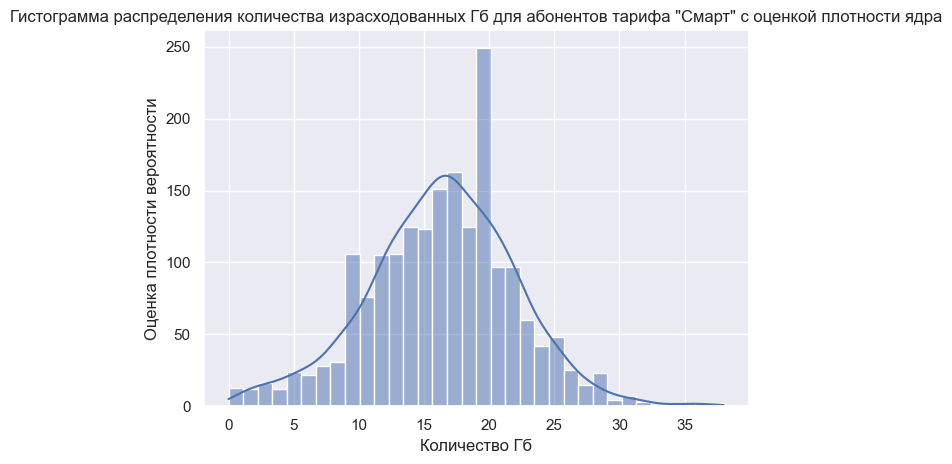

In [407]:
# строим гистограмму с оценкой плотности ядра
ax = sns.histplot(smart_df['total_gb'], kde=True)

# добавляем название диаграммы
ax.set_title('Гистограмма распределения количества израсходованных Гб для абонентов тарифа "Смарт" с оценкой плотности ядра')

# добавляем подписи к осям
ax.set_xlabel('Количество Гб')
ax.set_ylabel('Оценка плотности вероятности')

# показываем график
plt.show()

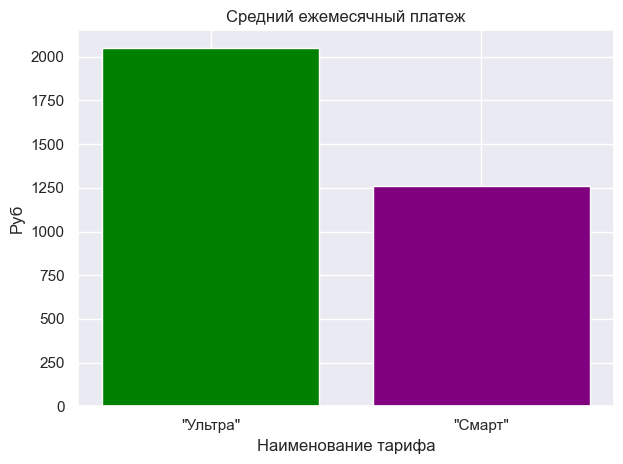

In [408]:
# total_price	excess_duration	excess_gb	excess_mess

# создаем фигуру и оси
fig, ax = plt.subplots()

# задаем ширину столбцов
bar_width = 1

ax.bar(0, ultra_df['total_price'].mean(), color='green')

# строим столбчатую диаграмму для второго набора данных
ax.bar(1, smart_df['total_price'].mean(), color='purple')

# добавляем подписи к столбцам
ax.set_xticks([0, 1])
ax.set_xticklabels(['"Ультра"', '"Смарт"'])

# добавляем название диаграммы
ax.set_title('Средний ежемесячный платеж')

# добавляем подписи к осям
ax.set_xlabel('Наименование тарифа')
ax.set_ylabel('Руб')

# показываем диаграмму
plt.show()

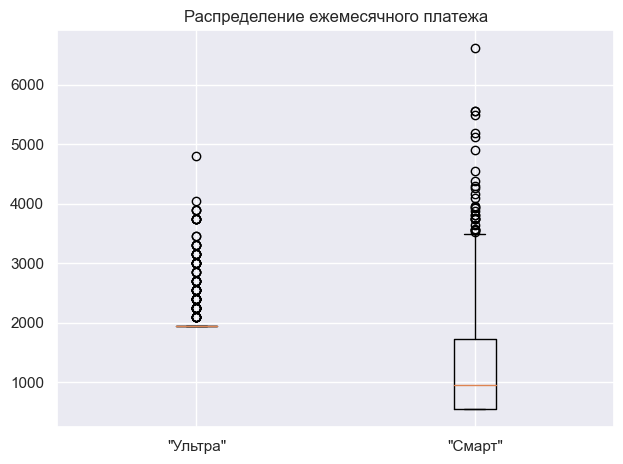

In [409]:
# создаем фигуру и оси
fig, ax = plt.subplots()

# строим ящики с усами
ax.boxplot([ultra_df['total_price'], smart_df['total_price']])

# добавляем подписи к столбцам
ax.set_xticklabels(['"Ультра"', '"Смарт"'])

# добавляем название диаграммы
ax.set_title('Распределение ежемесячного платежа')

# показываем график
plt.show()

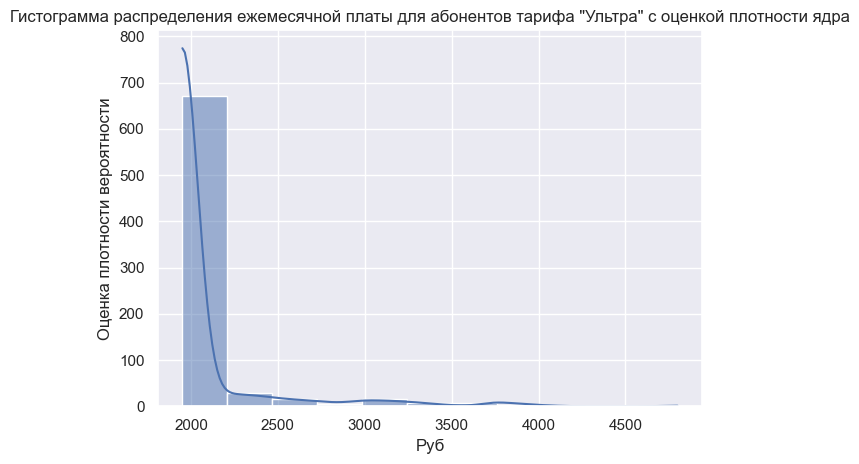

In [410]:
# строим гистограмму с оценкой плотности ядра
ax = sns.histplot(ultra_df['total_price'], kde=True)

# добавляем название диаграммы
ax.set_title('Гистограмма распределения ежемесячной платы для абонентов тарифа "Ультра" с оценкой плотности ядра')

# добавляем подписи к осям
ax.set_xlabel('Руб')
ax.set_ylabel('Оценка плотности вероятности')

# показываем график
plt.show()

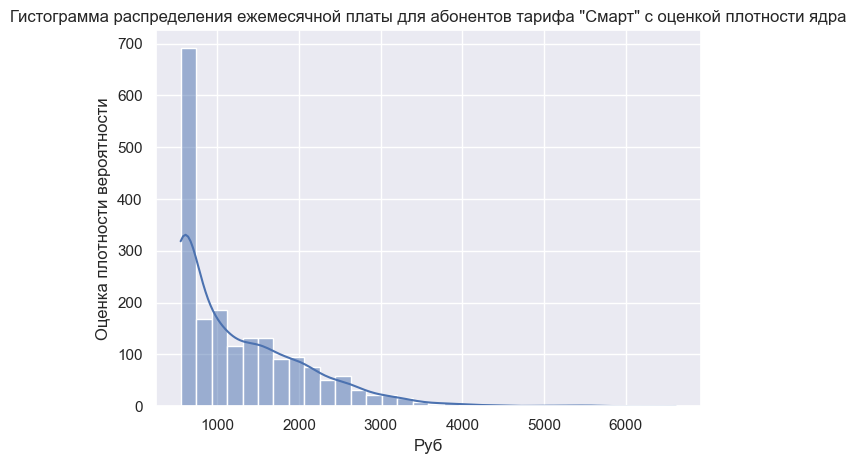

In [411]:
# строим гистограмму с оценкой плотности ядра
ax = sns.histplot(smart_df['total_price'], kde=True)

# добавляем название диаграммы
ax.set_title('Гистограмма распределения ежемесячной платы для абонентов тарифа "Смарт" с оценкой плотности ядра')

# добавляем подписи к осям
ax.set_xlabel('Руб')
ax.set_ylabel('Оценка плотности вероятности')

# показываем график
plt.show()

_____________
Шаг 4. *Проверьте гипотезы*
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [412]:
# Нулевая гипотеза - средние выручки равны
# Альтернативная - средние выручки различаются 
from scipy import stats
# выполняем двусторонний t-тест
t_statistic, p_value = stats.ttest_ind(ultra_df['total_price'], smart_df['total_price'])

alpha = 0.05


if p_value < alpha:
    print(f'Изменение среднего чека является статистически значимым (p-value = {p_value:.3f})')
else:
    print(f'Изменение среднего чека не является статистически значимым (p-value = {p_value:.3f})')

Изменение среднего чека является статистически значимым (p-value = 0.000)


In [413]:
users.sample(n=10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
81,1081,42,NaT,Москва,Софья,Терехова,2018-03-25,ultra
107,1107,45,NaT,Орёл,Руслан,Воронин,2018-07-20,smart
203,1203,39,NaT,Москва,Владимир,Григорьев,2018-03-13,ultra
157,1157,27,NaT,Москва,Виктория,Белоусова,2018-02-23,smart
59,1059,47,NaT,Курск,Глеб,Свиридов,2018-04-14,smart
344,1344,60,NaT,Воронеж,Илзе,Игнатьева,2018-04-03,ultra
492,1492,63,NaT,Санкт-Петербург,Руслана,Артёменко,2018-06-26,smart
167,1167,30,NaT,Кемерово,Клавдия,Абдулина,2018-09-29,ultra
72,1072,49,NaT,Уфа,Андрей,Андрейкин,2018-02-20,smart
327,1327,45,NaT,Новороссийск,Клавдия,Севастьянова,2018-04-09,smart


In [414]:
# создадим отдельные датасеты для пользователей из Москвы

ultra_msk = mounth_metrics[(mounth_metrics['tariff'] == 'ultra')& (users['city'] == 'Москва') ]
smart_msk = mounth_metrics[(mounth_metrics['tariff'] == 'smart')& (users['city'] == 'Москва') ]

Теперь сравним пользоваталей одних тарифов во всех регионах с пользователями из Москвы и сразу оценим, является ли эта разница статистически значимой 

In [415]:
# тариф "Ультра"
t_statistic, p_value = stats.ttest_ind(ultra_msk['total_price'], ultra_df['total_price'])

alpha = 0.05


if p_value < alpha:
    print(f'Изменение среднего чека в МСК от других регионов для пользоватлей "Ультра" является статистически значимым (p-value = {p_value:.3f})')
else:
    print(f'Изменение среднего чека в МСК от других регионов для пользоватлей "Ультра" не является статистически значимым (p-value = {p_value:.3f})')


Изменение среднего чека в МСК от других регионов для пользоватлей "Ультра" не является статистически значимым (p-value = 0.208)


c:\Users\orlov\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [416]:
# тариф "Смарт"
t_statistic, p_value = stats.ttest_ind(smart_msk['total_price'], smart_df['total_price'])

alpha = 0.05


if p_value < alpha:
    print(f'Изменение среднего чека в МСК от других регионов для пользоватлей "Смарт" является статистически значимым (p-value = {p_value:.3f})')
else:
    print(f'Изменение среднего чека в МСК от других регионов для пользоватлей "Смарт" не является статистически значимым (p-value = {p_value:.3f})')

Изменение среднего чека в МСК от других регионов для пользоватлей "Смарт" не является статистически значимым (p-value = 0.771)


_______
**Выводы по тарифам**

- Пользователи предпочитают тариф Smart.
- Больше дополнительного дохода у тарифа Smart.
- Общая прибыль больше у тарифа Smart.
- Пользователи двух тарифов используют примерно одинаковые объемы интернета, особенно на пиках графиков.
- В обоих тарифах мало пользуются отправкой сообщений.
- Несмотря на то, что больше прибыли приносит тариф Smart, среднняя выручка выше у Ultra.
- Разница в средней выручки из Москвы и других регонов - незначительная.